# 911 Calls Data Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

* Import numpy and pandas,Import visualization libraries and set %matplotlib inline.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

- Read in the csv file as a dataframe called df

In [135]:
df = pd.read_csv(r'C:\Users\Yash mishra\Downloads\archive\911.csv')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [136]:
# Reading the columns of df dataframe
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

## Data Cleaning

In [137]:
# Making copy of original dataframe to keep it safe
copy_data=df.copy()

In [138]:
# Droping of lat,lng,e as they are not of any use as of now
df.drop(['lat','lng','e'],axis=1,inplace=True)
df.tail(10)

,desc,zip,title,timeStamp,twp,addr
663512,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROV...,19403.0,EMS: FALL VICTIM,2020-07-29 15:33:09,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD
663513,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,NaN,Traffic: VEHICLE FIRE -,2020-07-29 15:34:11,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB
663514,VILLAGE DR & N GULPH RD; UPPER MERION; 2020-07...,19406.0,Traffic: VEHICLE FIRE -,2020-07-29 15:35:33,UPPER MERION,VILLAGE DR & N GULPH RD
663515,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,NaN,Traffic: VEHICLE FIRE -,2020-07-29 15:32:29,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB
663516,CHELSEA RD & EUSTON RD; CHELTENHAM; 2020-07-29...,19027.0,Fire: FIRE ALARM,2020-07-29 15:38:40,CHELTENHAM,CHELSEA RD & EUSTON RD
663517,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE
663518,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR
663519,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD
663520,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE
663521,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE


In [139]:
# Checking the size of our dataframe
df.shape

(663522, 6)

In [140]:
# Droping Na value from the zip column
df=df[~df['zip'].isna()]
df

,desc,zip,title,timeStamp,twp,addr
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
5,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST
...,...,...,...,...,...,...
663517,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE
663518,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR
663519,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD
663520,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE


In [141]:
# Making the description of call short and rediable using string slice, split and join function
df['desc']=df['desc'].str.split(';').str.slice(0,2).str.join(';')
df['desc']

0                      REINDEER CT & DEAD END;  NEW HANOVER
1            BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP
2                                      HAWS AVE; NORRISTOWN
3                           AIRY ST & SWEDE ST;  NORRISTOWN
5                          CANNON AVE & W 9TH ST;  LANSDALE
                                ...                        
663517             SUNSET AVE & WOODLAND AVE; EAST NORRITON
663518       EAGLEVILLE RD & BUNTING CIR;  LOWER PROVIDENCE
663519                  HAVERFORD STATION RD;  LOWER MERION
663520                   MARSHALL ST & HAWS AVE; NORRISTOWN
663521    HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...
Name: desc, Length: 583323, dtype: object

In [142]:
# Renaming the column names to make it more readiable
df.rename(columns={'twp':'Town Ship','addr':'Address','timeStamp':'Time Stamp','zip':'Zip Code','desc':'Desc'},inplace=True)
df.head()

,Desc,Zip Code,title,Time Stamp,Town Ship,Address
0,REINDEER CT & DEAD END; NEW HANOVER,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,HAWS AVE; NORRISTOWN,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,AIRY ST & SWEDE ST; NORRISTOWN,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
5,CANNON AVE & W 9TH ST; LANSDALE,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST


In [143]:
# Reseting the index of dataframe and droping the original ones
df.reset_index(drop=True)

,Desc,Zip Code,title,Time Stamp,Town Ship,Address
0,REINDEER CT & DEAD END; NEW HANOVER,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,HAWS AVE; NORRISTOWN,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,AIRY ST & SWEDE ST; NORRISTOWN,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,CANNON AVE & W 9TH ST; LANSDALE,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST
...,...,...,...,...,...,...
583318,SUNSET AVE & WOODLAND AVE; EAST NORRITON,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE
583319,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR
583320,HAVERFORD STATION RD; LOWER MERION,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD
583321,MARSHALL ST & HAWS AVE; NORRISTOWN,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583323 entries, 0 to 663521
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Desc        583323 non-null  object 
 1   Zip Code    583323 non-null  float64
 2   title       583323 non-null  object 
 3   Time Stamp  583323 non-null  object 
 4   Town Ship   583199 non-null  object 
 5   Address     583323 non-null  object 
dtypes: float64(1), object(5)
memory usage: 31.2+ MB


In [145]:
df.describe()

,Zip Code
count,583323.000000
mean,19236.055791
std,298.222637
min,1104.000000
25%,19038.000000
50%,19401.000000
75%,19446.000000
max,77316.000000


In [146]:
df.head(10)

,Desc,Zip Code,title,Time Stamp,Town Ship,Address
0,REINDEER CT & DEAD END; NEW HANOVER,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,HAWS AVE; NORRISTOWN,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,AIRY ST & SWEDE ST; NORRISTOWN,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
5,CANNON AVE & W 9TH ST; LANSDALE,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST
6,LAUREL AVE & OAKDALE AVE; HORSHAM,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE
7,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD
8,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE
9,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD
11,BROOK RD & COLWELL LN; PLYMOUTH,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN


## EDA

In [147]:
# Top 5 zip code for 911 call
df['Zip Code'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: Zip Code, dtype: int64

In [148]:
# Top 5 township for 911 call
df['Town Ship'].value_counts().head(5)

LOWER MERION    47487
ABINGTON        38137
NORRISTOWN      35881
POTTSTOWN       26837
CHELTENHAM      26647
Name: Town Ship, dtype: int64

In [149]:
# To find number of unique title column 
df['title'].nunique()

144

In [150]:
# Creating a new column named as Reason from title column
df['Reason'] = df['title'].str.split(":").str[0]
df.head()

,Desc,Zip Code,title,Time Stamp,Town Ship,Address,Reason
0,REINDEER CT & DEAD END; NEW HANOVER,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,HAWS AVE; NORRISTOWN,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire
3,AIRY ST & SWEDE ST; NORRISTOWN,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS
5,CANNON AVE & W 9TH ST; LANSDALE,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS


In [151]:
# To find top reason for the 911 calls
df['Reason'].value_counts()

EMS        304855
Traffic    189601
Fire        88867
Name: Reason, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

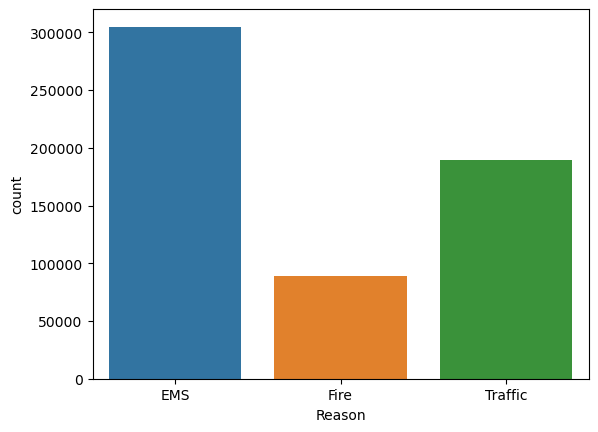

In [152]:
# To create countplot between reason and count
sns.countplot(x='Reason',data=df)

In [153]:
# To determine the type of timestamp column
type(df['Time Stamp'].iloc[0])

str

In [154]:
# To convert Time Stamp data type to datetime
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])
time = df['Time Stamp']
time

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
5        2015-12-10 15:39:04
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: Time Stamp, Length: 583323, dtype: datetime64[ns]

In [155]:
# To create 3 new column as hour, month, Day of week in 911 call data
df['Hour'] = df['Time Stamp'].apply(lambda time: time.hour)
df['Month'] = df['Time Stamp'].apply(lambda time: time.month)
df['Day of Week'] = df['Time Stamp'].apply(lambda time: time.dayofweek)
df.head()

,Desc,Zip Code,title,Time Stamp,Town Ship,Address,Reason,Hour,Month,Day of Week
0,REINDEER CT & DEAD END; NEW HANOVER,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3
2,HAWS AVE; NORRISTOWN,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,3
3,AIRY ST & SWEDE ST; NORRISTOWN,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,3
5,CANNON AVE & W 9TH ST; LANSDALE,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,15,12,3


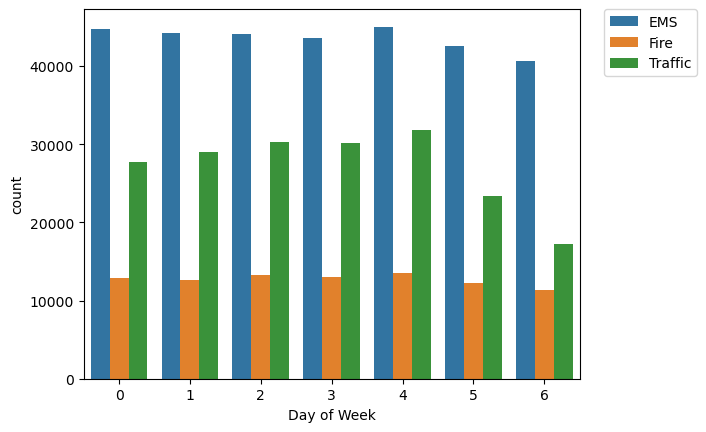

In [156]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

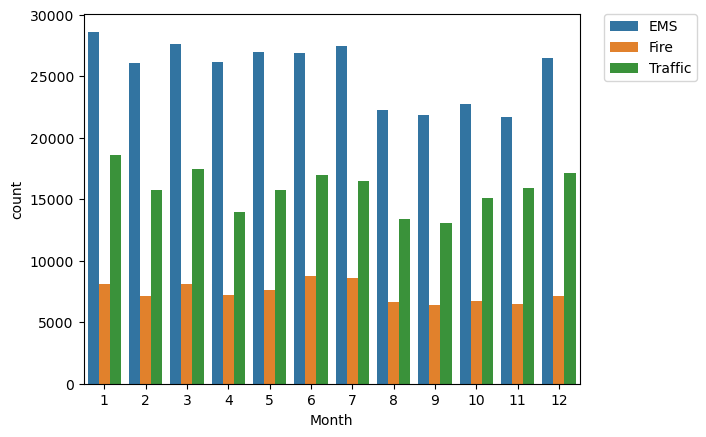

In [157]:
sns.countplot(x='Month',data=df,hue='Reason')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [158]:
# Some of the months are missing. We use groupby function to group dataset by months and count() for aggregation. 
byMonth = df.groupby('Month').count()
byMonth.head()

,Desc,Zip Code,title,Time Stamp,Town Ship,Address,Reason,Hour,Day of Week
Month,,,,,,,,,
1,55294,55294,55294,55294,55282,55294,55294,55294,55294
2,48922,48922,48922,48922,48916,48922,48922,48922,48922
3,53252,53252,53252,53252,53240,53252,53252,53252,53252
4,47349,47349,47349,47349,47344,47349,47349,47349,47349
5,50354,50354,50354,50354,50342,50354,50354,50354,50354


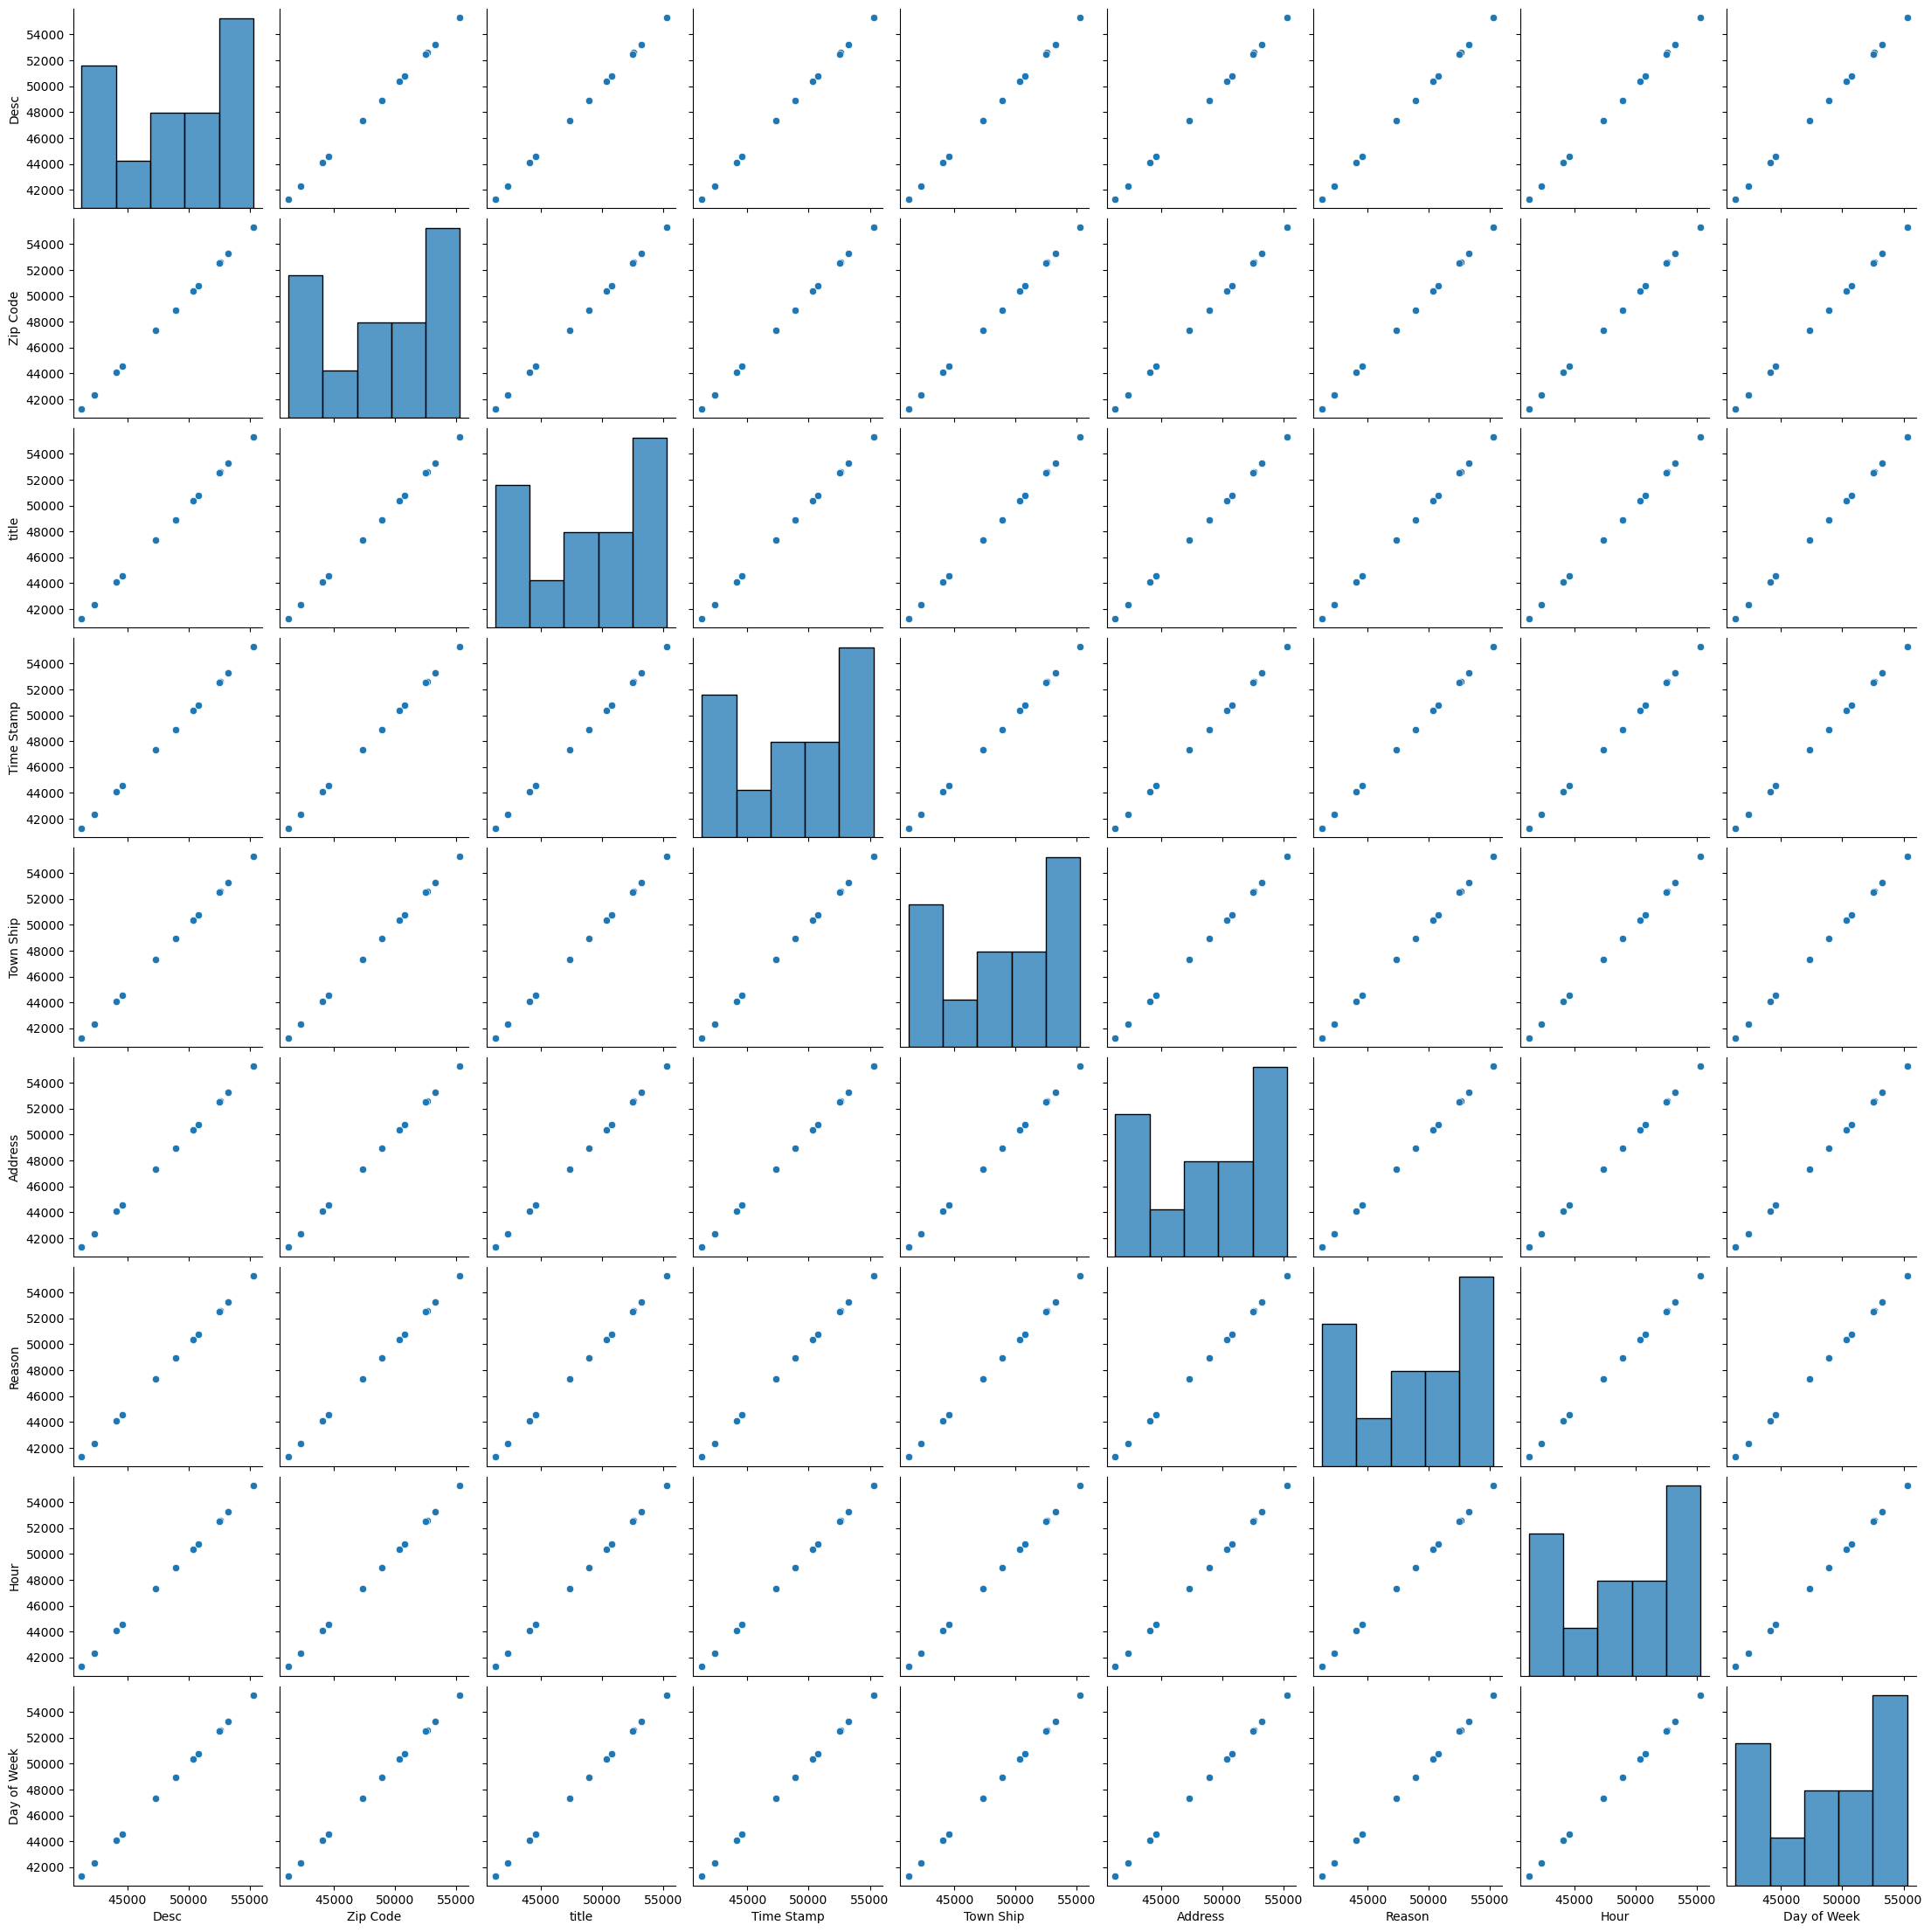

In [159]:
sns.pairplot(byMonth)

<Axes: xlabel='Month'>

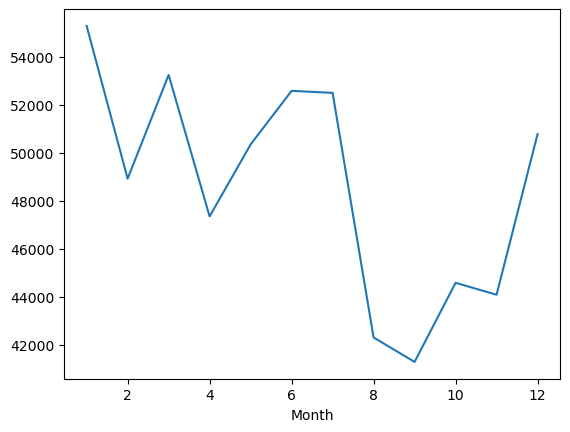

In [160]:
byMonth['Town Ship'].plot()

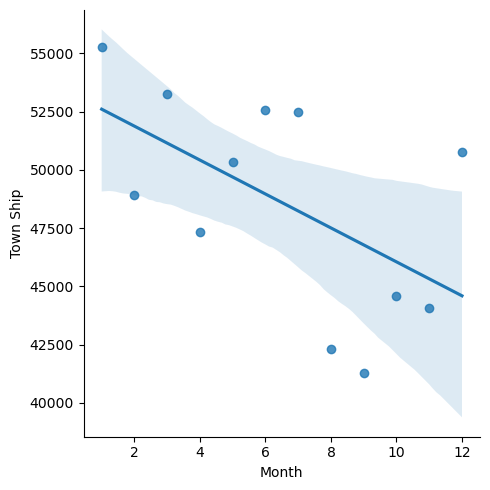

In [161]:
# To create linear fit on the number of call per month
sns.lmplot(x='Month',y='Town Ship',data=byMonth.reset_index())

In [162]:
# To create new column by name Date from timestamp column using lambda function
df['Date']=df['Time Stamp'].apply(lambda time: time.date())
df.head()

,Desc,Zip Code,title,Time Stamp,Town Ship,Address,Reason,Hour,Month,Day of Week,Date
0,REINDEER CT & DEAD END; NEW HANOVER,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3,2015-12-10
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3,2015-12-10
2,HAWS AVE; NORRISTOWN,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,3,2015-12-10
3,AIRY ST & SWEDE ST; NORRISTOWN,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,3,2015-12-10
5,CANNON AVE & W 9TH ST; LANSDALE,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,15,12,3,2015-12-10


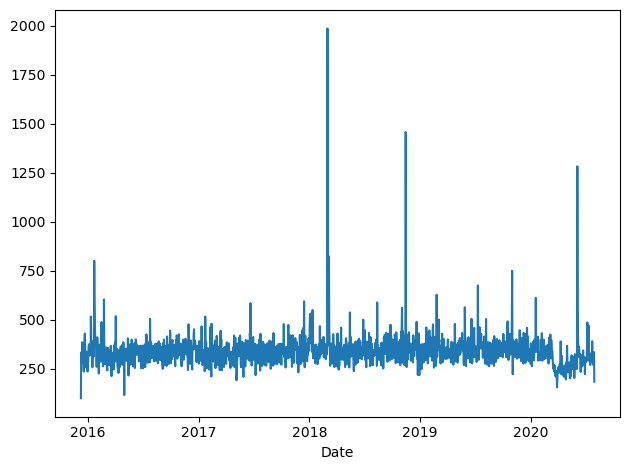

In [175]:
# To groupby date column and plot it
df.groupby('Date').count()['Town Ship'].plot()
plt.tight_layout()

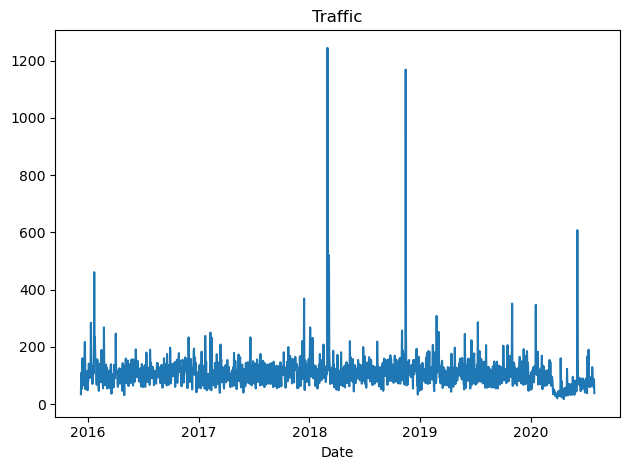

In [164]:
# To create 3 different plot  where each plot representing the reason
df[df['Reason']=='Traffic'].groupby('Date').count()['Town Ship'].plot()
plt.title('Traffic')
plt.tight_layout()

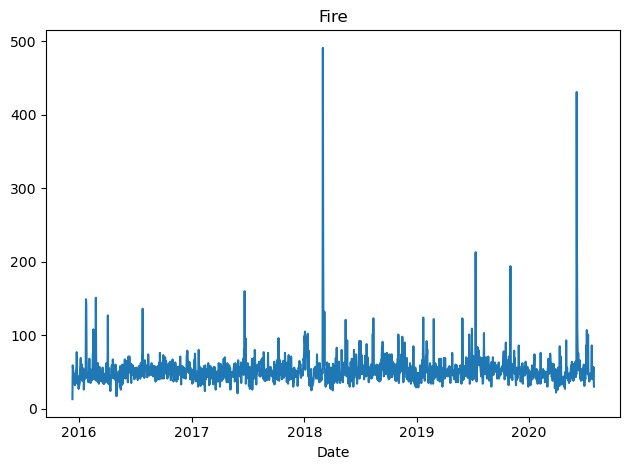

In [176]:
df[df['Reason']=='Fire'].groupby('Date').count()['Town Ship'].plot()
plt.title('Fire')
plt.tight_layout()

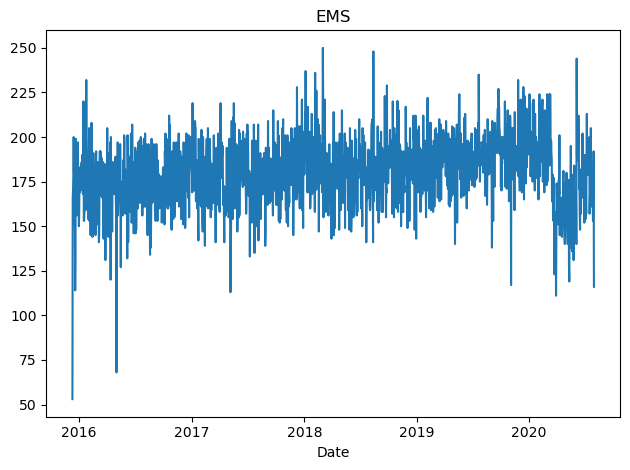

In [177]:
df[df['Reason']=='EMS'].groupby('Date').count()['Town Ship'].plot()
plt.title('EMS')
plt.tight_layout()

<Axes: xlabel='Hour', ylabel='Day of Week'>

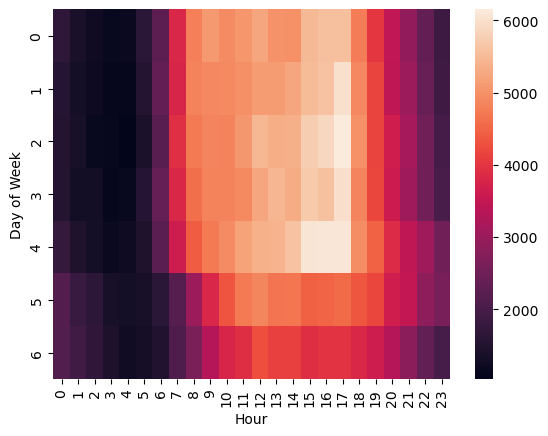

In [179]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()
sns.heatmap(dayHour)

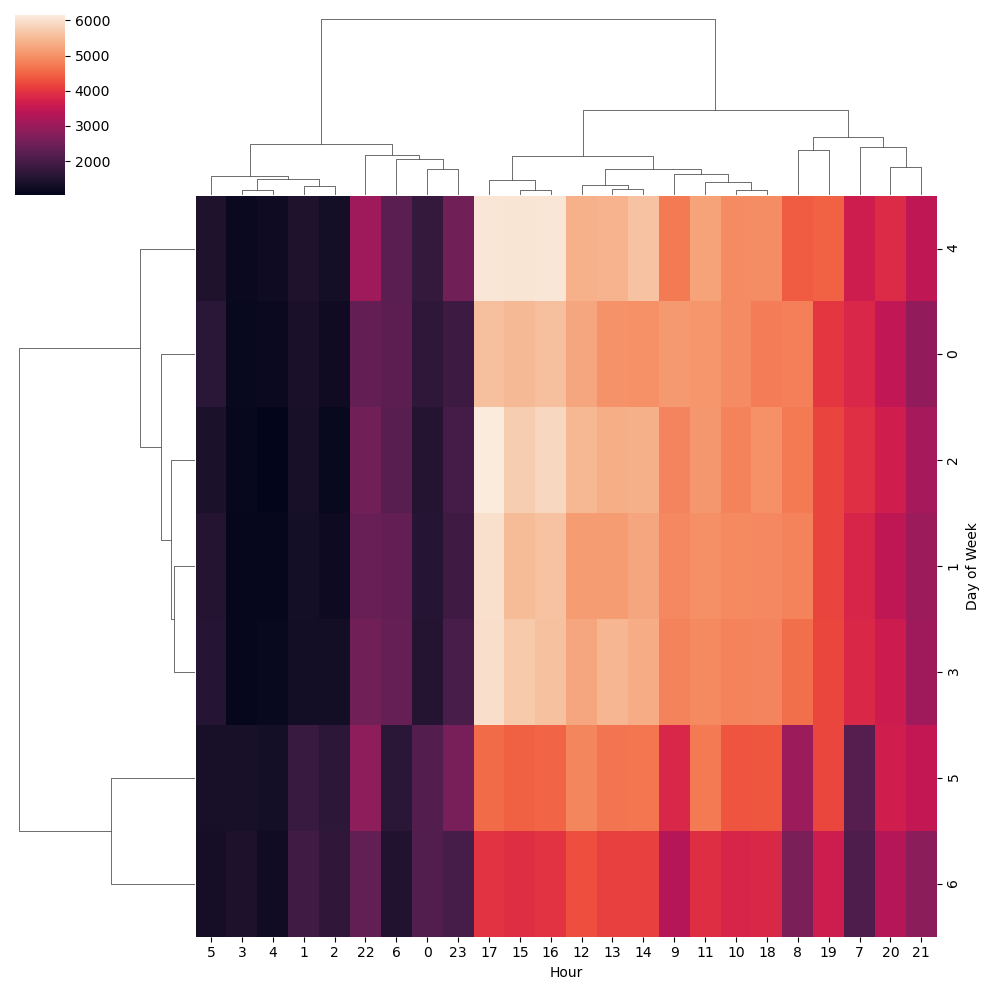

In [168]:
sns.clustermap(dayHour)

<Axes: xlabel='Month', ylabel='Day of Week'>

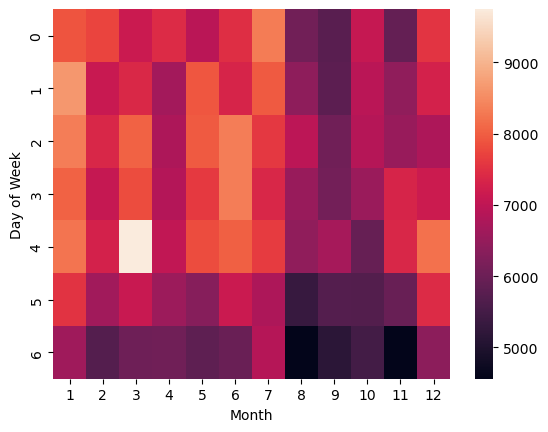

In [169]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()
sns.heatmap(dayMonth)

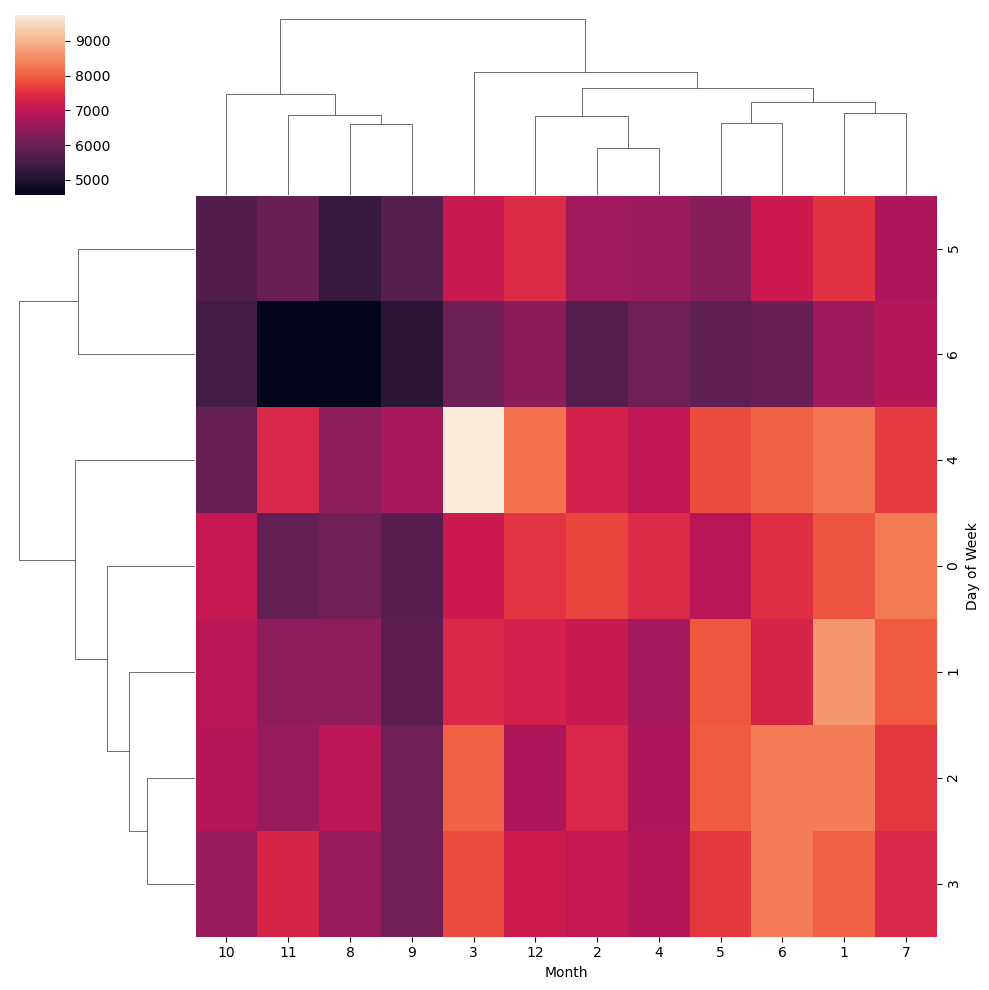

In [170]:
sns.clustermap(dayMonth)